# Predictive Models for a Market Campaign

In this we work, we propose two prediction models to optimize a market campaign. 
- First, we perform an exploratory data analysis to understand the data. 
- Then, we create features based on the patterns identified and hypotheses. 
- Next, we  segment customers that accept the target campaigns. 
- Then, we fit two classification models. 
- Finally, we discuss results and present insights.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime	

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_percentage(df, x, y):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    plt.show()
    
def remove_outliers(df, column, y=None):
    #remove outliers where |z| >  2    
    idxs = (np.abs(stats.zscore(df[column])) <= 2)
    if(y is not None):
        return df[idxs], y[idxs]
    else:
        return df[idxs]

df = pd.read_csv('ml_project1_data.csv').drop(columns='ID')

## Data set - First Steps

Let's first take a look at the data set.

In [97]:
df.head(n=10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
5,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,...,6,0,0,0,0,0,0,3,11,0
6,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,...,6,0,0,0,0,0,0,3,11,0
7,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,...,8,0,0,0,0,0,0,3,11,0
8,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,...,9,0,0,0,0,0,0,3,11,1
9,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,...,20,1,0,0,0,0,0,3,11,0


Let's look for duplicate entries:
- About 8.1\% of the entries are duplicate
- We decided to drop duplicate entries

In [98]:
print(df.duplicated().sum()/len(df))
df.drop_duplicates(inplace=True)

0.08125


Let's get a bird's eye view of the data and check for missing data. We can conclude that:
- There are outliers in 'Year_birth' since its minimum value is 1893. Thus, let's remove entries where Year_Birth' is less than 1940
- There are missing data in Income so that missing entries amount to 1.16\%
- Income shows a large standard deviation
- Z_CostContact and Z_Revenue have zero standard deviation. Since they provide no information, they should be discarded

In [99]:
print(df.describe())

        Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2058.000000    2034.000000  2058.000000  2058.000000  2058.000000   
mean   1968.787172   52357.791544     0.445578     0.509232    48.951895   
std      11.973898   25526.956988     0.537556     0.546489    28.999189   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35528.250000     0.000000     0.000000    24.000000   
50%    1970.000000   51533.000000     0.000000     0.000000    49.000000   
75%    1977.000000   68480.750000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2058.000000  2058.000000      2058.000000      2058.000000   
mean    303.921769    26.234694       167.704568        37.329446   
std     336.528217    39.750728       228.303238        54.657215   
min       0.000000     0.000000        

In [100]:
df = df[df.Year_Birth >= 1940]

In [101]:
print(df.isna().sum()/len(df)*100)

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.167883
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64


Let's check if we have a balanced data set with respect to the target variable. Based on the following output, we can conclude that the data set is unbalanced. Namely, 15\% of the customers turn out to accept the target campaign.

In [102]:
df.Response.value_counts(normalize=True)


0    0.847689
1    0.152311
Name: Response, dtype: float64

Since there are 24 missing entries for Income, let's assess how those entries are distributed with respect to the target variable. There is just one missing entry when the customer accepts the target campaign. Thus, we decide to drop all of those missing entries.

In [103]:
idx = df.Income.isna()
df[idx]['Response'].value_counts()

0    23
1     1
Name: Response, dtype: int64

In [104]:
df.dropna(subset=['Income'], inplace=True)

## Exploratory Data Analysis

### Descriptive Analysis

Most customers have higher education qualification. For instance, 21% of the customers hold a PhD degree, which turns out to be unusual. Thus, this sample might be biased.

Graduation    0.501723
PhD           0.218612
Master        0.165436
2n Cycle      0.090103
Basic         0.024126
Name: Education, dtype: float64


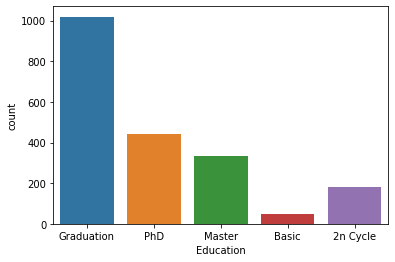

In [105]:
print(df.Education.value_counts(normalize=True))

sns.countplot(x='Education', data=df)

YOLO and Absurd are atypical marital status. Furthermore, Single and Alone can be turned into a single status, so can Together and Married.

Married     0.387986
Together    0.252585
Single      0.215657
Divorced    0.105859
Widow       0.034466
Alone       0.001477
Absurd      0.000985
YOLO        0.000985
Name: Marital_Status, dtype: float64


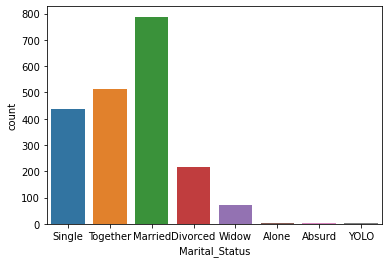

In [106]:
print(df.Marital_Status.value_counts(normalize=True))

sns.countplot(x='Marital_Status', data=df)

Based on the standard deviation and min value, we can conclude that there are outliers in Income and Year_Birth.

In [107]:
cols = [col for col in df.columns if col.startswith('Num') or col.startswith('Mnt')]
cols += ['Year_Birth', 'Income', 'Recency']

print(df[cols].describe())

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2031.000000  2031.000000      2031.000000      2031.000000   
mean    305.248646    26.257509       167.728213        37.446578   
std     337.298807    39.709576       226.732978        54.804255   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.000000     2.000000        16.000000         3.000000   
50%     176.000000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       230.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2031.000000   2031.000000        2031.000000      2031.000000   
mean          27.147710     43.750862           2.339734         4.101920   
std           41.509472     51.615450           1.934593         2.757694   
min            0.000000      0.000000           0.000000         0.000

Based on the following plots, we can conclude that:
- Customers who accept the target campaign tend to slightly spend higher amount in the last 2 years. 
- There is no visual correlation between these covariates. 
- There are some extreme values for Meat and Gold products.

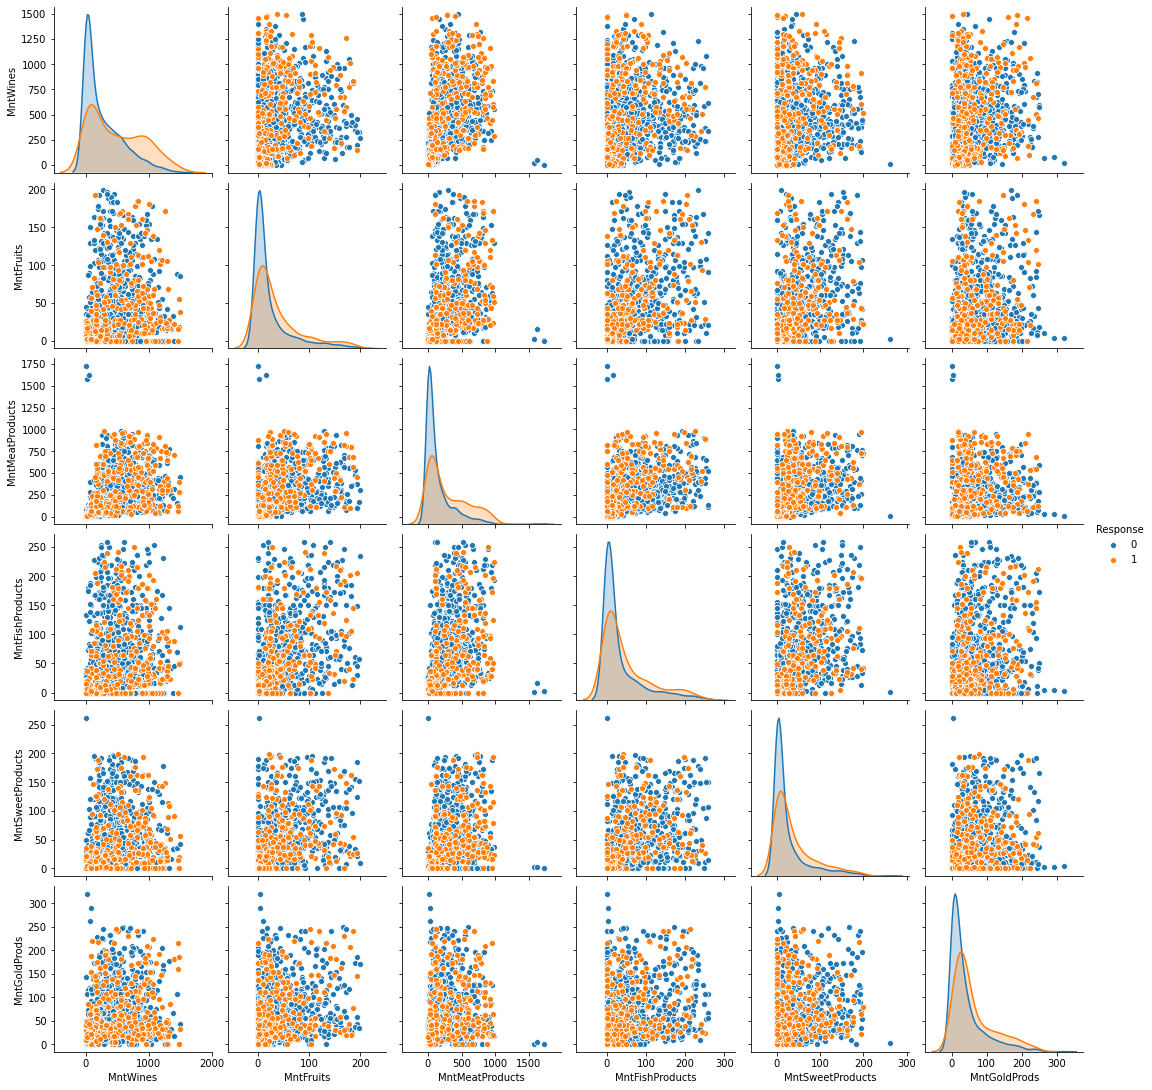

In [108]:
cols = [col for col in df.columns if col.startswith('Mnt')]
sns.pairplot(df[cols + ['Response']], hue='Response')
plt.show()

The following  plots suggest that:
- Customers who accept the target campaign show higher number of purchases on the Web, using Catalog or directly in stores.
- There is no clear differences with respect to number of purchases made with discount and to the number of visits to company's web site.

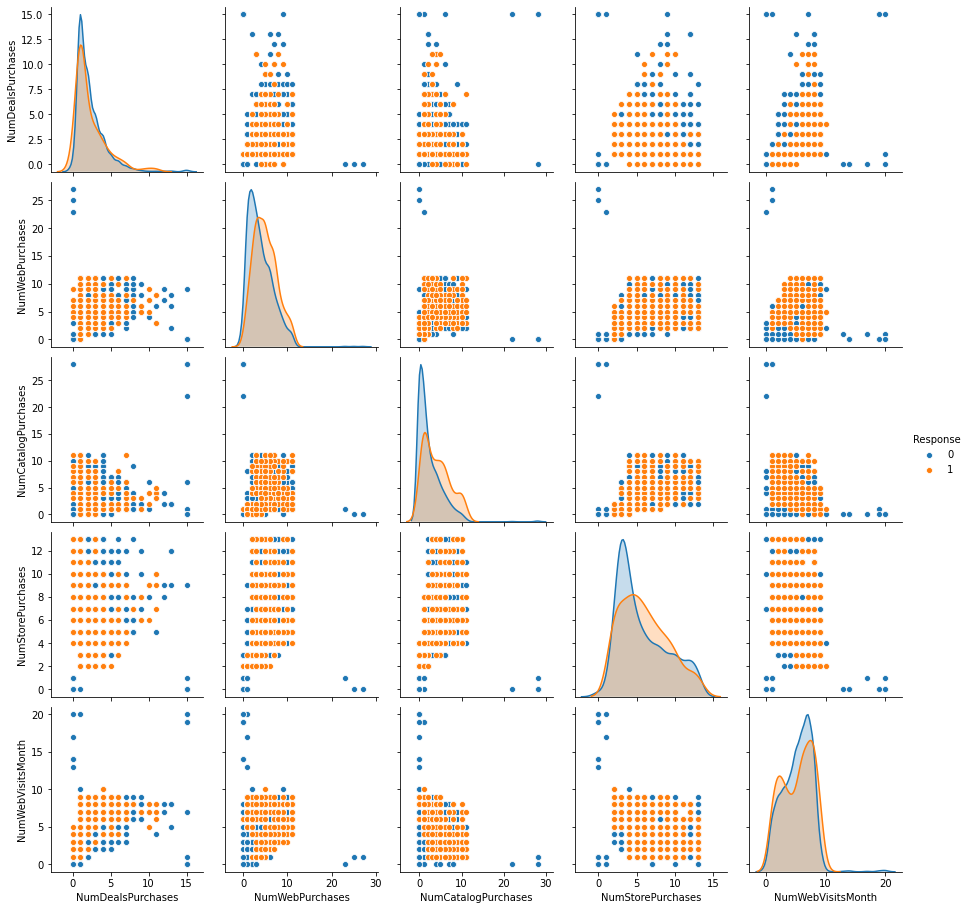

In [109]:
cols = [col for col in df.columns if col.startswith('Num')]

sns.pairplot(df[cols + ['Response']], hue='Response')
plt.show()

Next, we consider Income. Based on the following plot, we can conclude that:
- There are extreme values
- The distribution resembles a bell-shaped curve.


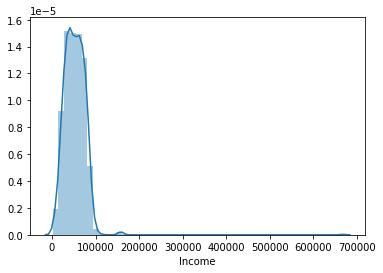

In [110]:
sns.distplot(df['Income'])
plt.show()

Income         
                  mean   median
Response                       
0         50929.009889  50272.0
1         60155.211538  64044.0

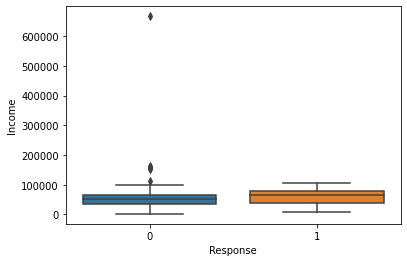

In [111]:
sns.boxplot(x='Response', y='Income', data=df)

df.groupby('Response').aggregate({'Income': ['mean', 'median']})

Let's delete outliers with respect to Income. To this end, we remove entries whose absolute value of the z-score is greater than 2. This strategy stems from the fact that  about 95\% of mass distribution of a Normal distribution falls within 2 standard deviations of the mean.

After removing outliers, we can conclude that:

- The distribution resembles a bell-shaped curve.
- The distribution presents two modes.

Let's dive into those findings.

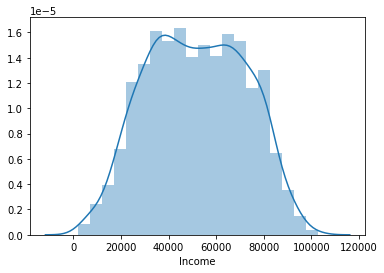

In [112]:
df = remove_outliers(df, 'Income')

sns.distplot(df['Income'])
plt.show()

Based on the following plot, we can conclude that
- The two distributions of acceptance are bimodal
- The distribution for customers who accept the target campaign presents a higher mode

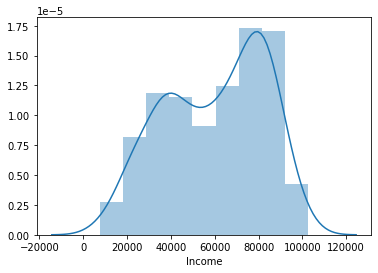

In [113]:
idx = (df.Response == 1)
sns.distplot(df.loc[idx, 'Income'])
plt.show()

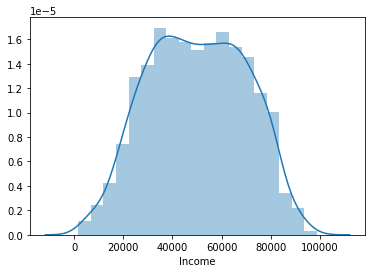

In [114]:
idx = (df.Response == 0)
sns.distplot(df.loc[idx, 'Income'])
plt.show()

### Customer Acceptance Analysis

**Does Income explain the target variable?**

Based on the following plots, we can conclue that:
- Customers who accept the target campaign have higher income
- The larger the income, the higher the chances of accepting the target campaign 

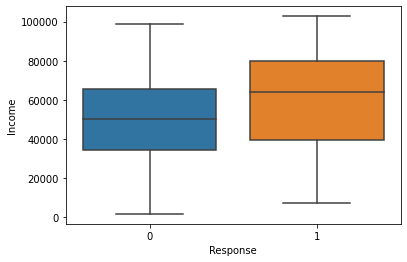

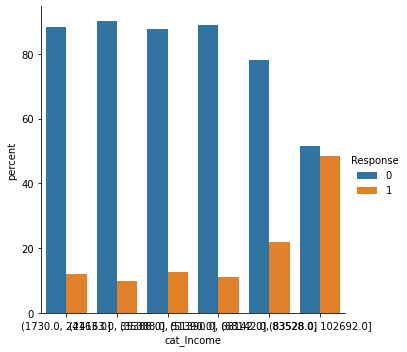

In [115]:
sns.boxplot(x='Response', y='Income', data=df)

df.groupby('Response').aggregate({'Income': ['mean', 'median']})


col = 'Income'
col_cat = 'cat_'+col

bins = [df[col].min()] + list(df[col].quantile([.1, .25, .50, .75, .95]).values) + [df[col].max()] 
df[col_cat] =  pd.cut(df[col], bins=bins)
plot_percentage(df, col_cat, 'Response')

**Does Education impact the target variable**?

Based on next plot, we can conclude that:
- The higher the customer's education level, the greater the chances of accepting the target campaign.

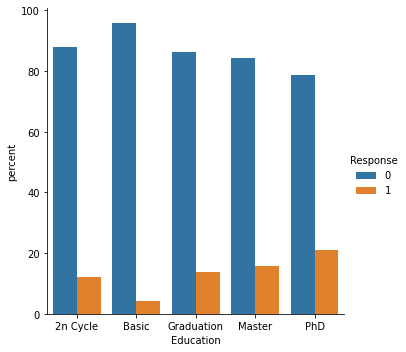

In [116]:
plot_percentage(df, 'Education', 'Response')

**Does marital status explain the target variable?**

Based on the following plot, we conclude that:
- Conversion rates are higher among Unmarried customers.
- We should merge the following pairs of status: i) Alone and Single, ii) Divorced and Widow
- Absurd and YOLO seem to have no predictive power on the target variable

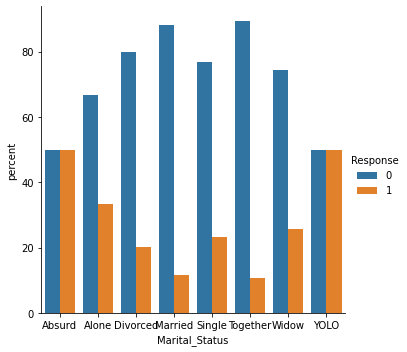

In [117]:
plot_percentage(df, 'Marital_Status', 'Response')

**Does the result of previous campaigns explain the target variable?**

Next, we assess the chances of accepting the target campaign given the result of previous campaigns:
- Customers who had accepted campaigns 1,2,5 are more likely to accept the offer in the target campaign.
- The larger the number of previous campaigns accepted, the higher the chances of accepting the target campaign.

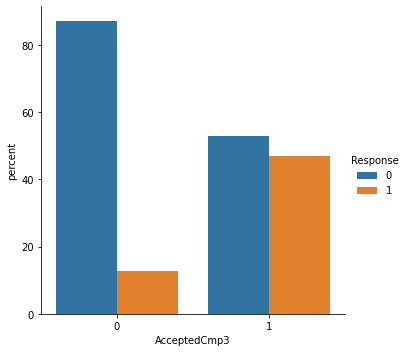

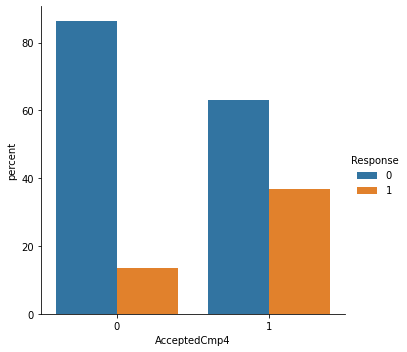

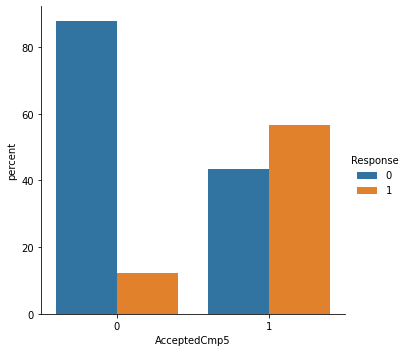

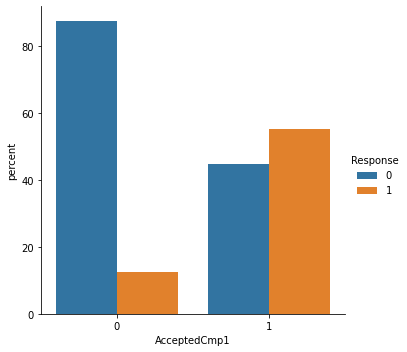

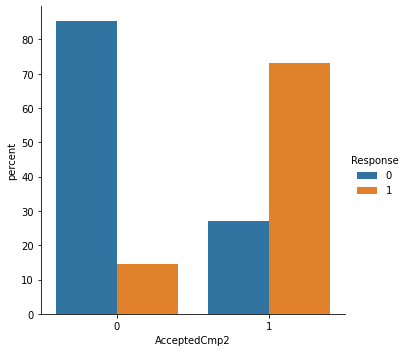

In [118]:
for col in df.columns:
    if col.startswith('Acce'):
        plot_percentage(df, col, 'Response')    

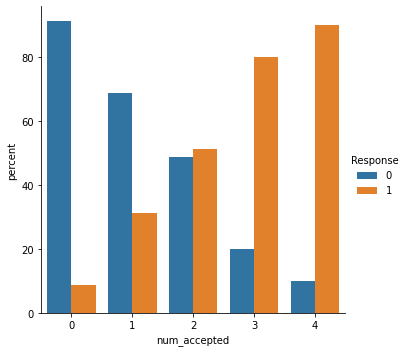

In [119]:
df['num_accepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

plot_percentage(df, 'num_accepted', 'Response')

**Are Customers that enrolled recently inclined to accept the target campaign?**

Let's analyze the impact of the date of customer's enrollment. Based on the following plot, we can conclude:
- The larger the number of days since the date of enrollment, the lower the chances of accepting the target campaign

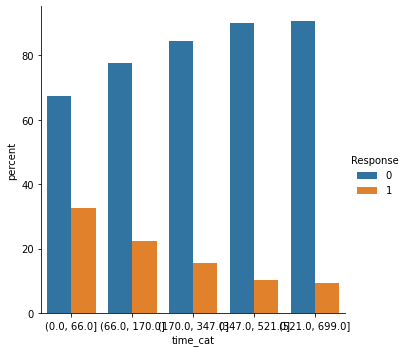

In [120]:
time = pd.to_datetime(df.Dt_Customer)
time = time - time.min()  
df['time'] = time.dt.days

bins = [df.time.min()] + list(df.time.quantile([.1, .25, .50, .75]).values) + [df.time.max()] 
df['time_cat'] =  pd.cut(df.time, bins=bins)
plot_percentage(df, 'time_cat', 'Response')

**Does Age impact the target variable?**

Based on the next two plots, we can conclude that:

- In general, age does not seem to significantly impact the target variable
- Younger customers are more inclined to accept the target campaign

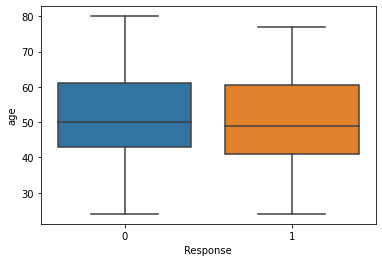

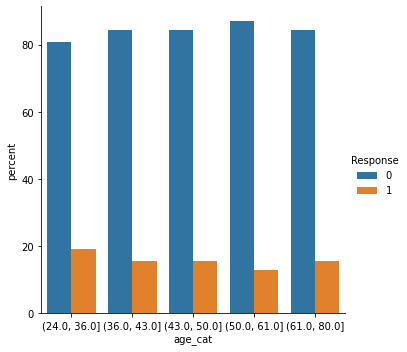

In [121]:
df.Year_Birth.value_counts()
sorted(df.Year_Birth)

df['age']  = int(datetime.now().strftime('%Y')) - df['Year_Birth'] 


sns.boxplot(x='Response', y='age', data=df)

col = 'age'
col_cat = col+'_cat'

bins = [df[col].min()] + list(df[col].quantile([.1, .25, .50, .75]).values) + [df[col].max()] 
df[col_cat] =  pd.cut(df[col], bins=bins)
plot_percentage(df, col_cat, 'Response')

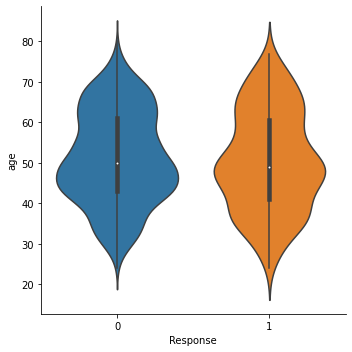

In [122]:
sns.catplot(x='Response', y='age', kind='violin', data=df)

**Does the number of children/teenagers affect the target variable?**

Based on the following plots, we can conclude that:

- Customers with no children show higher chances of accepting the target campaign.

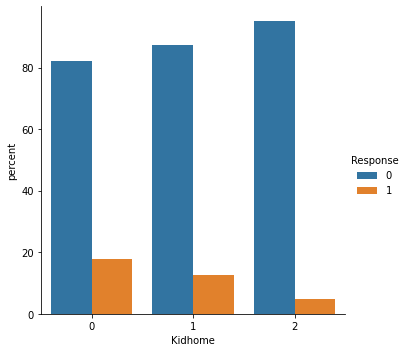

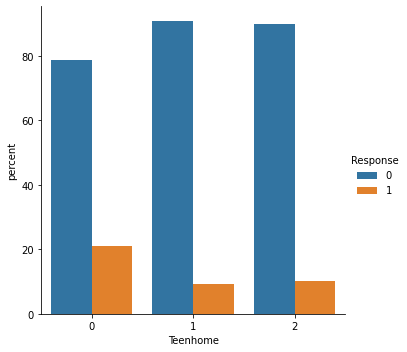

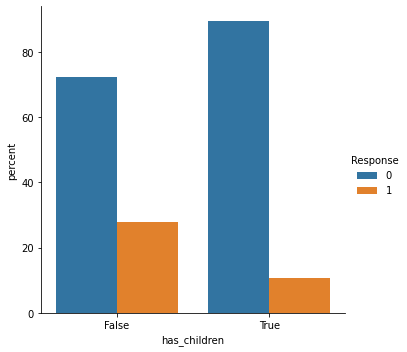

In [123]:
plot_percentage(df, 'Kidhome', 'Response')
plot_percentage(df, 'Teenhome', 'Response')

idx = (df.Kidhome > 0) | (df.Teenhome > 0)
df['has_children'] = False
df.loc[idx, 'has_children'] = True

plot_percentage(df, 'has_children', 'Response')

**Does Recency explain the target variable?**

Based on the following plot, we can conclude that:
- Customers who have recently purchased are more likely to accept the target campaign.

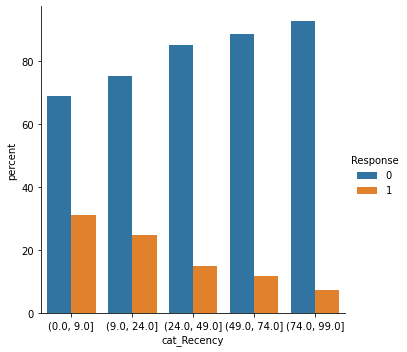

In [124]:
col = 'Recency'
col_cat = 'cat_'+col

bins = [df[col].min()] + list(df[col].quantile([.1, .25, .50, .75]).values) + [df[col].max()] 
df[col_cat] =  pd.cut(df[col], bins=bins)
plot_percentage(df, col_cat, 'Response')

**How does Recency interact with Time?**

Based on the following two plots, customers that accept the target campaign has recently enrolled and purchased.

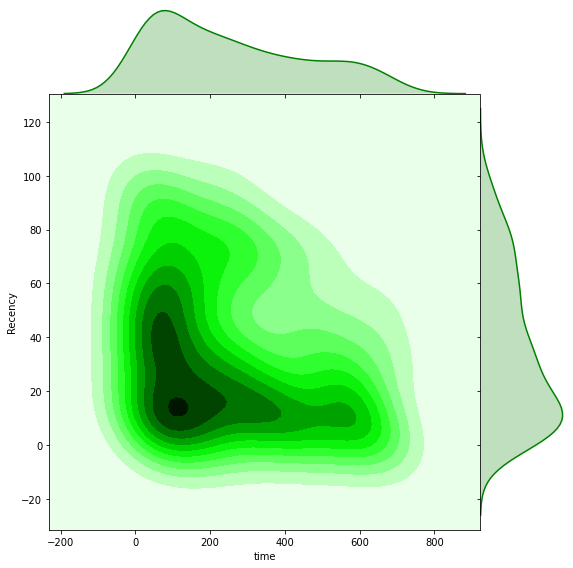

In [23]:
idx = (df['Response'] == 1)
sns.jointplot('time','Recency', data=df[idx], kind="kde", space=0, color="g",  height=8)
plt.show()

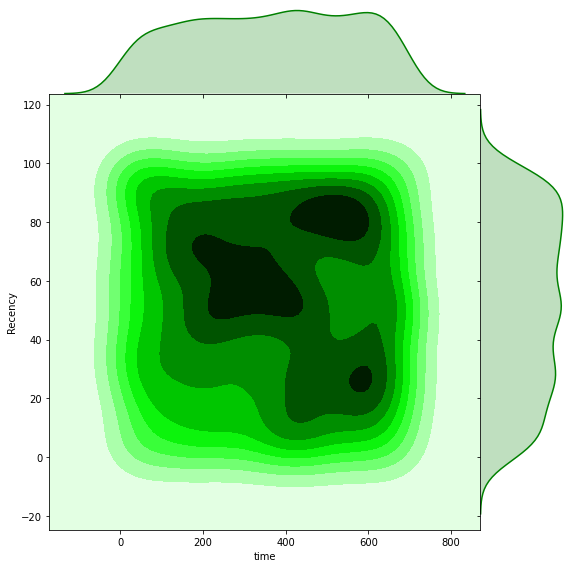

In [25]:
idx = (df['Response'] == 0)
sns.jointplot('time','Recency', data=df[idx], kind="kde", space=0, color="g",  height=8)
plt.show()

**Are customers with no complaints more likely to accept the target campaign?**

Bases on the following plot, we can conclude that complain column does not seems to explain the target variable.

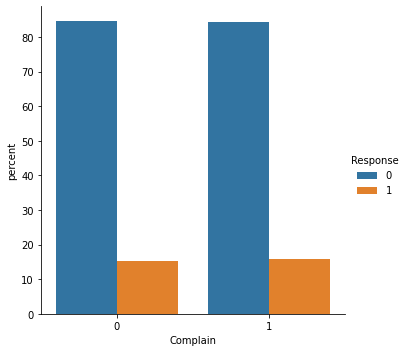

In [125]:
plot_percentage(df, 'Complain', 'Response')

**Does the amount spent in the last two years explain the target variable?**

Next, we analyze the impact of each product type on the target variable. We can conclude that:
- Customers who accepted the target campaign show higher spending in each product type
- The larger the amount spent in the last two years is, the more likely a customer is to accept the target campaign

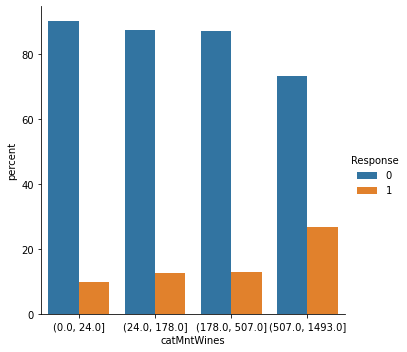

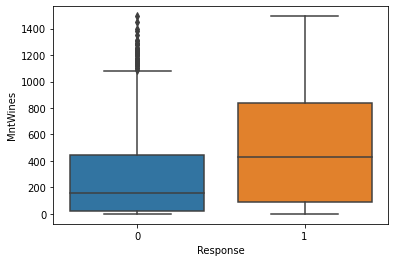

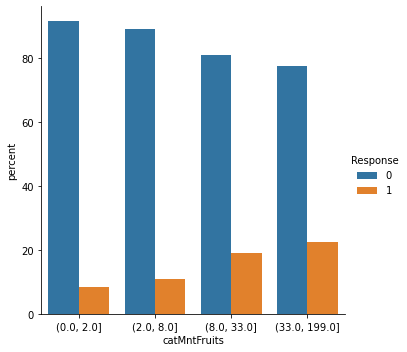

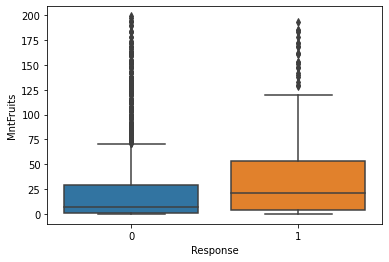

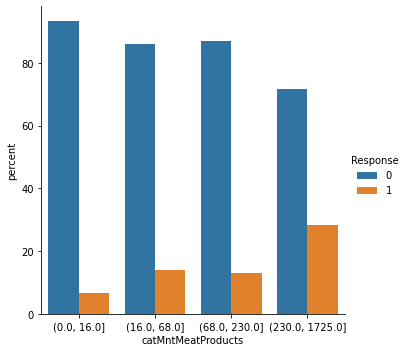

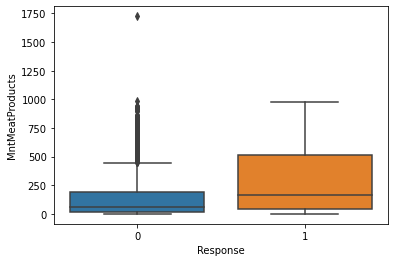

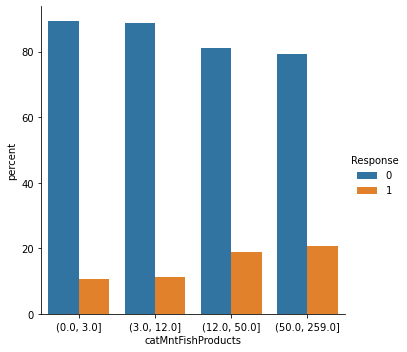

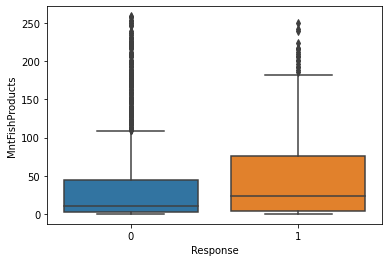

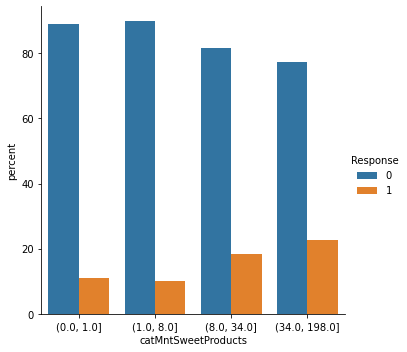

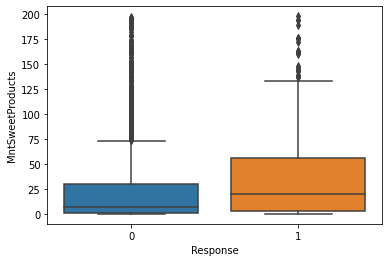

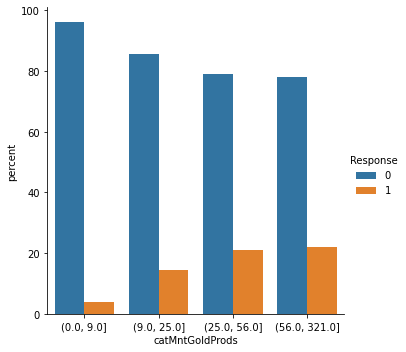

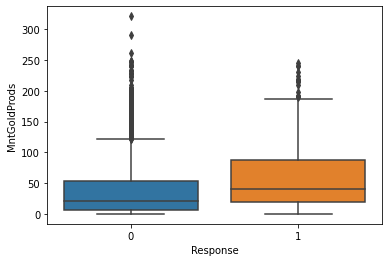

In [126]:
for col in df.columns:
    if col.startswith('Mnt'):
        #col = 'MntFruits'
        col_cat = 'cat'+col

        bins = [df[col].min()] + list(df[col].quantile([.25, .50, .75]).values) + [df[col].max()] 
        df[col_cat] =  pd.cut(df[col], bins=bins)
        plot_percentage(df, col_cat, 'Response')
        
        sns.boxplot(x='Response', y=col, data=df)

**Does the number of purchases or the number of web visits explain the target variable?**

Based on the following plots, we can conclude that:
- Customers who accepted the target campaign show higher figures for web purchases, catalog purchases and store purchases. On the other hand, they show lower values for the number of purchases made with discount
- The larger the number of purchases using web site, catalog and stores the more likely a customer is to accept the target campaign.

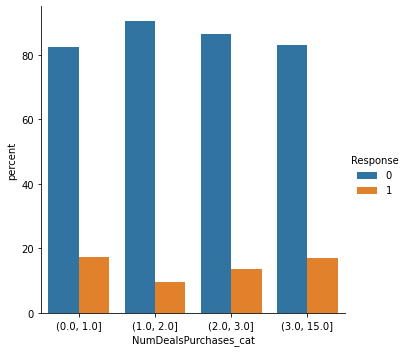

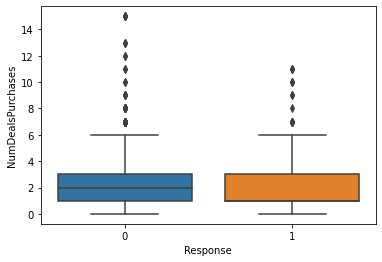

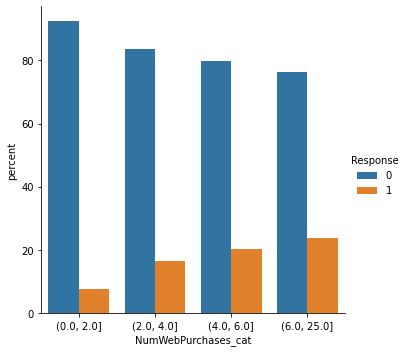

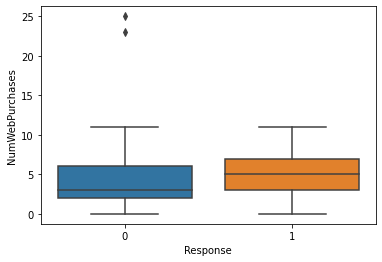

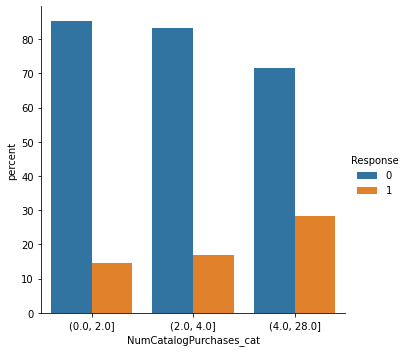

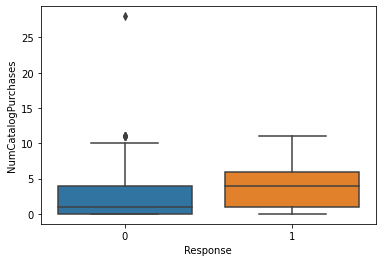

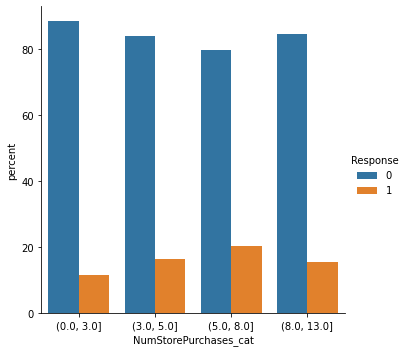

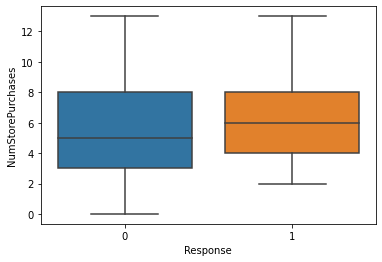

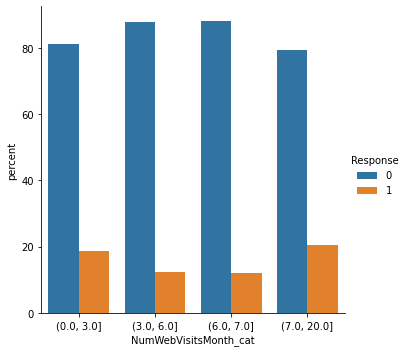

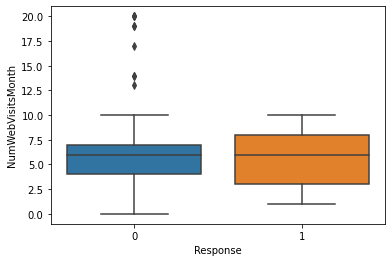

In [127]:
for col in df.columns:
    if col.startswith('Num'):
        #col = 'MntFruits'
        col_cat = col+'_cat'

        bins = [df[col].min()] + list(df[col].quantile([.25, .50, .75]).values) + [df[col].max()] 
        bins = list(set(bins))
        df[col_cat] =  pd.cut(df[col], bins=bins)
        plot_percentage(df, col_cat, 'Response')
        
        sns.boxplot(x='Response', y=col, data=df)

In [129]:
# from sklearn.preprocessing import PolynomialFeatures

# cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
# poly = PolynomialFeatures(5, interaction_only=True,  include_bias=False)
# transformed = poly.fit_transform(df[cols])

# cols = poly.get_feature_names(cols)

# foo = pd.DataFrame(data=transformed, columns=cols)
# foo['Response'] = df['Response']

# for c in foo.columns:
#     plot_percentage(foo, c, 'Response')


# Feature Engineering



Based on the Exploratory Data Analysis, we create next features that might contribute to explain the target variable.

In [2]:
df = pd.read_csv('ml_project1_data.csv').drop(columns='ID').dropna(subset=['Income'])

df.drop_duplicates(inplace=True)
df = df[df.Year_Birth >= 1940]

First, we create features related to the customer's consumption pattern. These features might be used in customer segmentation:
- Proportion of purchases for each cateogry: Deals, Web, Catalog, Store
- Proportion of amount spent for each product type: Fish, Meat, Sweet, Wines, Gold
- Ratio between total amount spent and Income. This feature can be regarded as the customer's budget in the company.


Also, we create a feature that accounts for the total number of previous campaigns accepted. One should note this feature introduces multicollinearity which is an issue for logistic regression models.

In [3]:
purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
_df1 = df[purchases].div(df[purchases].sum(axis=1)+1e-6, axis=0)
_df1.columns = ['pct_'+col for col in purchases]


mnt = [col for col in df.columns if col.startswith('Mnt')]
total = df[mnt].sum(axis=1)+1e-6

_df2 = df[mnt].div(total, axis=0)
_df2.columns = ['pct_'+col for col in mnt]

df = pd.concat([df, _df1, _df2], axis=1)

df['pct_spent'] = total.div(df['Income'], axis=0)

df['num_accepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

Next, we convert categorical columns into indicator variables

In [4]:
df = pd.get_dummies(df, columns=['Education'], prefix='is').drop(columns=['is_Basic'])

single_idx = (df.Marital_Status == 'Alone') |  (df.Marital_Status == 'Single')
unmarried_idx = (df.Marital_Status == 'Divorced') |  (df.Marital_Status == 'Widow')

df['is_single'] = 0
df.loc[single_idx,'is_single'] = 1

df['is_unmarried'] = 0
df.loc[unmarried_idx,'is_unmarried'] = 1

Next, we turn the date of customer's enrollment with the company into the number of days of enrollment since the most recent enrollment.

In [5]:
time = pd.to_datetime(df.Dt_Customer)
time = time - time.min()  
df['time'] = time.dt.days

We create a indicator column that assumes 1 if the customer has children or teenagers at home or 0 otherwise.
    



In [6]:
#df['Income']= df['Income'].apply(np.log)
idx = (df.Kidhome > 0) | (df.Teenhome > 0)
df['has_children'] = 0
df.loc[idx, 'has_children'] = 1

keep = [col for col in df.columns if col.startswith('Mnt') or col.startswith('is_') | col.startswith('has_') | col.startswith('pct_') |  col.startswith('Acce')]

keep += ['Income', 'Response', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'time']

## Model Evaluation

Since the data set is unbalanced, we use Precision, Recall and F1 scoring metrics; for further information we refer the reader for this [link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Loosely speaking, Precision is the proportion of positive predictions that are correct. In turn, Recall is the fraction of actual positives was identified correctly. Finally, F1 is a weighted average of both Precision and Recall.

First, we split the data into train and test sets, where the train set accounts for 80\% of the original data set. We resort to k-fold cross validation in the training data set to perform training and hyperparemeters tuning. We make use of grid search cross with validation for hyperparameter tuning. Finally, we report results obtained in the test set.

Next, we define some functions to:
- split the data set into training and testing. 
- print confusion matrix
- print Precision Recall curve
- print metrics

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc


def split(df, y_column, valid=True):
    x_train, x_test = train_test_split(df, test_size=0.2, stratify=df[y_column])
    if valid:
        x_test, x_val = train_test_split(x_test, test_size=0.5, stratify=x_test[y_column])
        y_val = x_val[[y_column]]

    y_train = x_train[[y_column]]
    y_test = x_test[[y_column]]

    x_train.drop(columns=[y_column], inplace=True)
    x_test.drop(columns=[y_column], inplace=True)

    if valid:
        x_val.drop(columns=[y_column], inplace=True)
        return x_train, x_val, x_test, y_train, y_val, y_test
    else:
        return x_train, x_test, y_train, y_test



def plot_confusion_matrix(y_test, y_pred_class):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred_class)
    matriz = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()    
    


def print_precision_recall_curve(y_test, y_pred_scores):
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_scores)
    no_skill = y_test.sum()/len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label='Algorithm')
    # axis labels
    title = 'AUC Precision Recall: %.2f'%(auc(lr_recall, lr_precision))
    plt.title(title, y=1.1)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    
def print_metrics(y_true, y_pred):
    print('Accuracy: %.2f'%(accuracy_score(y_true, y_pred)))
    print('Precision: %.2f'%(precision_score(y_test, y_pred)))
    print('Recall: %.2f'%(recall_score(y_true, y_pred)))
    print('F1: %.2f'%(f1_score(y_true, y_pred)))

## Principal Component Analysis (PCA)

Here we use PCA to visualize the training data in two dimensions. Based on the plot, we can conclude that:
- The first two principal components accounts for 33% of variability in training.
- There is no evidence of separability with respect to the target variable

In [9]:
x_train, x_test, y_train, y_test = split(df[keep], 'Response', False)
x_train, y_train = remove_outliers(x_train, 'Income', y_train)


from sklearn.preprocessing import MinMaxScaler, StandardScaler


scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)



from sklearn.decomposition import PCA

import seaborn as sns
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
transformed = pca.fit_transform(x_train)
df2d = pd.DataFrame(transformed)
df2d['target'] = y_train.reset_index(drop=True)

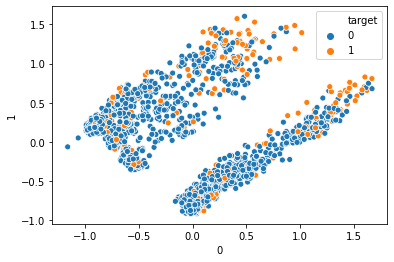

0.33183936939133163


In [10]:
sns.scatterplot(x=0, y=1, hue='target', data=df2d)
plt.show()
print(pca.explained_variance_ratio_.sum())

## PCA and Linear Regression

In this step, we first perform PCA retaining 85% of total variability and then fit a logistic regression model. The results are discussed in the Logistic Regression (LR) section.

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 124 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done 225 out of 225 | elapsed:    3.1s finished


Best Params:  {'C': 0.1, 'class_weight': {0: 1, 1: 4}}
Accuracy: 0.78
Precision: 0.35
Recall: 0.49
F1: 0.41


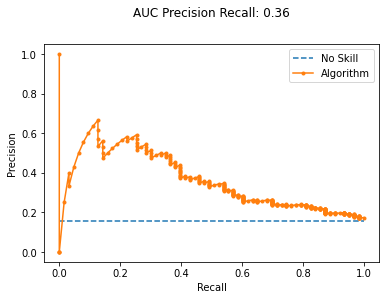

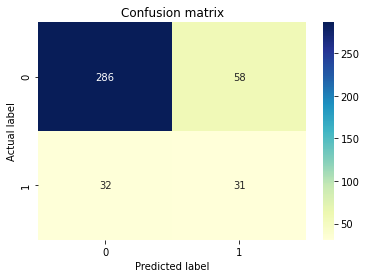

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV

_df = df.drop(columns='num_accepted')

x_train, x_test, y_train, y_test = split(_df[keep], 'Response', False)
x_train, y_train = remove_outliers(x_train, 'Income', y_train)
x_train_columns = x_train.columns

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(0.85)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

from sklearn.linear_model import LogisticRegression

weights = [{0:1, 1:i} for i in range(2,11,1)]
reg = [1e-8, 1e-6, 1e-4, 1e-2, 1e-1]
grid={'C': reg, 'class_weight' : weights}

lr_cv = GridSearchCV(LogisticRegression(max_iter=1000), grid, scoring='f1', cv=5, n_jobs=3, verbose=1)
lr_cv.fit(x_train,y_train)


print('Best Params: ',lr_cv.best_params_)

y_pred_prob = lr_cv.best_estimator_.predict_proba(x_test)[::,1]
#y_pred_class = binarize([y_pred_prob], 0.5)[0]
y_pred_class = lr_cv.predict(x_test)
print_metrics(y_test, y_pred_class)

print_precision_recall_curve(y_test, y_pred_prob)
plot_confusion_matrix(y_test, y_pred_class)

## K means

Based on the findings using PCA, we make use of K Means to assess clustering in the training. Based on the elbow method, we can conclude that there is no clear clustering pattern in training.

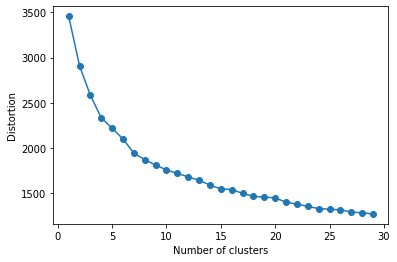

In [138]:
from sklearn.cluster import KMeans

x_train, x_test, y_train, y_test = split(df[keep], 'Response', False)
x_train, y_train = remove_outliers(x_train, 'Income', y_train)
x_train_columns = x_train.columns

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

n_clusters = 30
distortions = []
for i in range(1, n_clusters):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x_train)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, n_clusters), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Customer Segmentation

We make use of K-Means to segment customers in training that accept the target campaign. To this end, we cluster those customers into three groups. However, there are clear differences among two groups:
- Group 1:  Customer has recently purchased  and enrolled with the company, low income, has children, holds graduation degree, high amount spent in gold products, high number of purchases made with discount
- Group 3: Customers has  neither recently purchased  nor enrolled with the company, high income, has no children, holds graduation degree, high amount spent in meat products, high number of purchases made using catalog or in stores.


In [59]:
cols = ['pct_NumDealsPurchases', 'pct_NumWebPurchases', 'pct_NumCatalogPurchases',\
       'pct_NumStorePurchases', 'pct_MntWines', 'pct_MntFruits',\
       'pct_MntMeatProducts', 'pct_MntFishProducts', 'pct_MntSweetProducts',\
       'pct_MntGoldProds', 'pct_spent', 'is_2n Cycle', 'is_Graduation',
       'is_Master', 'is_PhD', 'is_single', 'is_unmarried', 'has_children',
       'Income', 'Recency', 'time','Response']

x_train, x_test, y_train, y_test = split(df[cols], 'Response', False)
x_train, y_train = remove_outliers(x_train, 'Income', y_train)

idx = (y_train['Response'] == 1)
x_train = x_train[idx]


scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x_train)
x_train_transformed = scaler.transform(x_train)


from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
).fit(x_train_transformed)


In [60]:
labels = pd.DataFrame(km.labels_)
x_train_clustered = x_train.reset_index(drop=True).assign(cluster=labels)

In [61]:
grouped_km = x_train_clustered.groupby(['cluster']).median().round(2)
grouped_km.T

cluster,0,1,2
pct_NumDealsPurchases,0.14,0.29,0.05
pct_NumWebPurchases,0.29,0.29,0.25
pct_NumCatalogPurchases,0.18,0.12,0.30
pct_NumStorePurchases,0.33,0.30,0.38
pct_MntWines,0.55,0.39,0.44
pct_MntFruits,0.02,0.03,0.04
pct_MntMeatProducts,0.21,0.25,0.34
pct_MntFishProducts,0.03,0.04,0.05
pct_MntSweetProducts,0.02,0.03,0.04
pct_MntGoldProds,0.05,0.19,0.05


## Logistic Regression (LR)

Logistic regression is the workhorse for binary classification problems. To this end, we remove 'num_accepted' column so that the model does not face multicollinearity issues.

Hyperparameters we fine-tune:
- Class weights: Since the data set is unbalanced, we perform a weighted linear regression. Thus, we penalize the model for making classification mistakes on the minority class, where each class has a weight.
- Regularization strength: To overcome overfitting, we use L2-regularization, which amounts to the sum of the squares of all the regression coefficients.

In [146]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV

_df = df.drop(columns='num_accepted')

x_train, x_test, y_train, y_test = split(_df[keep], 'Response', False)
x_train, y_train = remove_outliers(x_train, 'Income', y_train)
x_train_columns = x_train.columns

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.linear_model import LogisticRegression

weights = [{0:1, 1:i} for i in range(2,11,1)]
reg = [1e-8, 1e-6, 1e-4, 1e-2, 1e-1]
grid={'C': reg, 'class_weight' : weights}

lr_cv = GridSearchCV(LogisticRegression(max_iter=1000), grid, scoring='f1', cv=5, n_jobs=3, verbose=1)
lr_cv.fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 208 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done 225 out of 225 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=3,
             param_grid={'C': [1e-08, 1e-06, 0.0001, 0.01, 0.1],
                         'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 4}, {0: 1, 1: 5},
                                          {0: 1, 1: 6}, {0: 1, 1: 7},
                                          {0: 1, 1: 8}, {0: 1, 1: 9},
                                          {0: 1, 1: 10}]},
             scoring='f1', verbose=1)

The best configuration for hyperparameters are found:
- regularization strength: 10
- class weights: a positive class instance weighs four times as much as a negative class instance

The final results are presented next:

| Algorithm | AUC Recall Precision | Precision | Recall | F1 |
| --- | --- | --- | --- | --- |
| LR | 0.65 | 0.52 | 0.76 | 0.62 |

This Linear Regression provides superior results compared to the counterpart that makes use of PCA.

Best Params:  {'C': 0.1, 'class_weight': {0: 1, 1: 4}}
Accuracy: 0.86
Precision: 0.52
Recall: 0.76
F1: 0.62


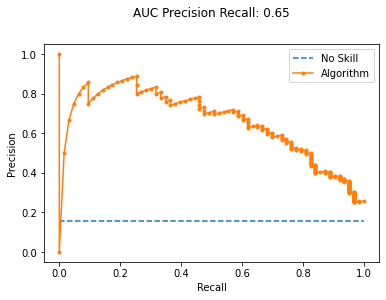

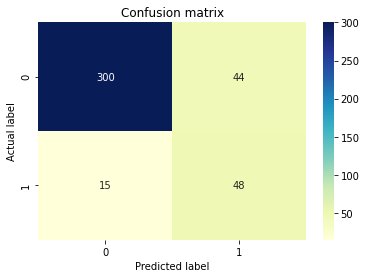

In [147]:
print('Best Params: ',lr_cv.best_params_)

y_pred_prob = lr_cv.best_estimator_.predict_proba(x_test)[::,1]
#y_pred_class = binarize([y_pred_prob], 0.5)[0]
y_pred_class = lr_cv.predict(x_test)
print_metrics(y_test, y_pred_class)

print_precision_recall_curve(y_test, y_pred_prob)
plot_confusion_matrix(y_test, y_pred_class)

**What are the most important features that explain the target variable?**

Based on the chart below, we can conclude that the most important features are:
- Customer's time-related features: recency and lifespan
- Acceptance of previous campaigns

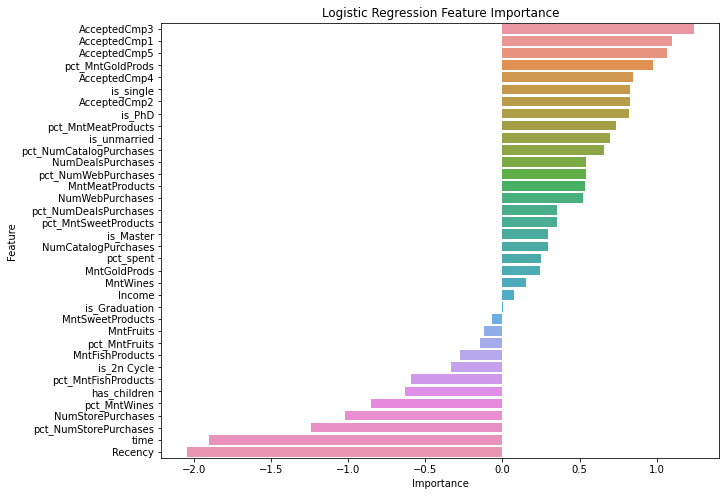

In [167]:
importances = lr_cv.best_estimator_.coef_[0]

def plot_feature_importance(importance, names, model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')


plot_feature_importance(importances, x_train_columns, 'Logistic Regression')

# Random Forest

Random Forest (RF) is a bagging based learning method that relies on Decision Trees. Loosely speaking, RF learning algorithm fits a decision tree for each subsample and searches for the best split point on a random sample of feature space.

We decide to fin-tune the following hyperparameters:
- Maximum depth tree
- Minimum number of samples required to be a leaf node
- Number of decision trees in the forest
- Maximum number of columns taken into account for finding the est split point
- Weights associated with classes

In [158]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = split(df[keep], 'Response', False)
x_train, y_train = remove_outliers(x_train, 'Income', y_train)
x_train_columns = x_train.columns

param_grid = {
    'max_depth': [5, 10, 50],
    #'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.8, 0.9, 1.0],
    #'class_weight' : ['balanced', 'balanced_subsample']
    'class_weight': [{0:1, 1:i} for i in [2,4,8,16,32]]
}

rf_cv = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1', cv=3, n_jobs=3, verbose=1)
rf_cv.fit(x_train,y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    9.7s
[Parallel(n_jobs=3)]: Done 302 tasks      | elapsed:   43.8s
[Parallel(n_jobs=3)]: Done 747 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done 1385 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done 1615 out of 1620 | elapsed:  3.6min remaining:    0.7s
[Parallel(n_jobs=3)]: Done 1620 out of 1620 | elapsed:  3.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 4},
                                          {0: 1, 1: 8}, {0: 1, 1: 16},
                                          {0: 1, 1: 32}],
                         'max_depth': [5, 10, 50],
                         'max_samples': [0.8, 0.9, 1.0],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

Best Params:  {'class_weight': {0: 1, 1: 8}, 'max_depth': 50, 'max_samples': 0.8, 'min_samples_leaf': 10, 'n_estimators': 100}
Accuracy: 0.82
Precision: 0.45
Recall: 0.71
F1: 0.55


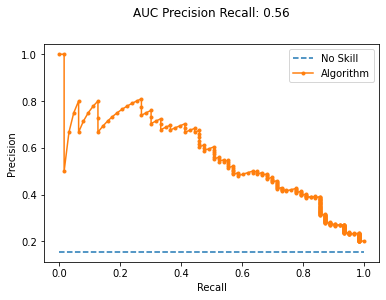

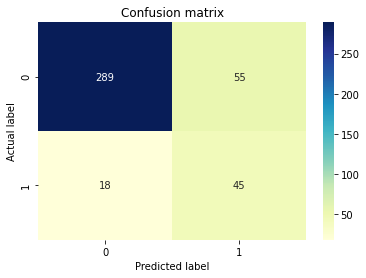

In [160]:
print('Best Params: ',rf_cv.best_params_)

y_pred_prob = rf_cv.best_estimator_.predict_proba(x_test)[::,1]
y_pred_class = rf_cv.predict(x_test)
#y_pred_class = binarize([y_pred_prob], 0.5)[0]
print_metrics(y_test, y_pred_class)

print_precision_recall_curve(y_test, y_pred_prob)
plot_confusion_matrix(y_test, y_pred_class)

The best configuration for hyperparameters are found:
- Maximum depth tree: 50
- Maximum number of columns: 80%
- Minimum number of samples: 10
- Number of decision trees in the forest: 100
- Weights associated with classes: a positive class instance weighs eight times as much as a negative class instance.


The results are presented next:

| Algorithm | AUC Recall Precision | Precision | Recall | F1 |
| --- | --- | --- | --- | --- |
| RF | 0.56 | 0.45 | 0.71 | 0.55 |

**What are the most important features that explain the target variable?**

Based on the feature importance plot below, we can conclude that the most important features are:
- Customer's time-related features: recency and lifespan
- Customer's consumption behavior
    
    
    


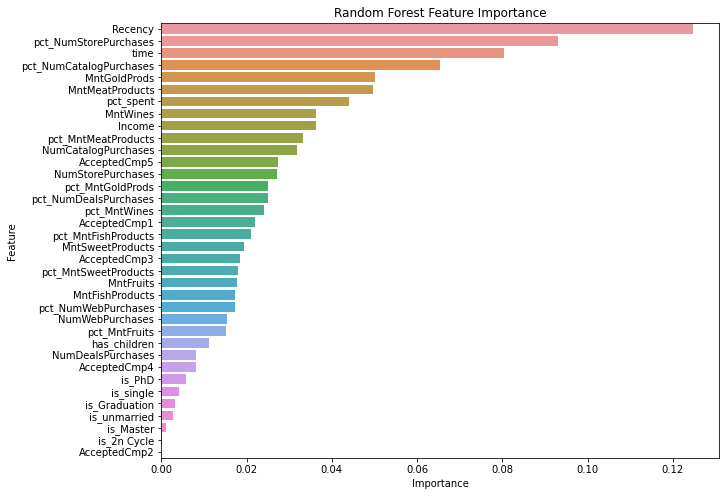

In [163]:
importances = rf_cv.best_estimator_.feature_importances_
features = x_train.columns

def plot_feature_importance(importance, names, model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')


plot_feature_importance(importances, features, 'Random Forest')

# Final Results and Insights

Experiments show that Logistic Regression presents results at least 7% superior when compared to Random Forest. Thus, Logistic Regression should be used in production.

 | Algorithm | AUC Recall Precision | Precision | Recall | F1 |
| --- | --- | --- | --- | --- |
| LR | (+16%) **0.65**  | (+15%) **0.52** | (+7%) **0.76** | (12%) **0.62** |
| RF | 0.56 | 0.45 | 0.71 | 0.55 |

Based on the findings, we recommend a customer profile for targeting the campaigns:

- High-income customers
- High-education customers
- High-spending customers
- Unmarried (single, widow, alone) customers
- Customers that have accepted previous campaigns
- Customers who have recently enrolled (ideally up to 200 days)
- Customers who have recently purchased (ideally up to 20 days)
- Customers with no children/teenagers
- Customers who use to purchase by channels: web and catalog

Market campaigns might be personalized based on the two main groups we found in the customer segmentation analysis.

## Further Investigation

We envision several avenues for further investigation:

- Techniques for tackling unbalanced data set such as SMOTE, Resampling
- Classification algorithms such as Support Vector Machines and Boosting
- Fine-tuning the classification threshold for classification. However, this adjustment should be made based on expert's guidelines.